### Import required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms

from utilities.dataloader import check_and_update_csv, split_train_val_test, ConstructionDataset

## Task 1: Data loading

Task 1.1 Data cleaning
1. remove entries which do not exist

In [2]:
data_dir = 'data' 
img_dir = os.path.join(data_dir, 'foundation_images/foundation_images')

##### Run the below code if running for the first time ######
##--> removes entries in the stage_labels.csv which do not exist and
##--> stores them in stage_labels_corr.csvs
# csv_file_path = os.path.join(data_dir,'stage_labels.csv')
# new_csv_file_path = os.path.join(data_dir,'stage_labels_corr.csv')

# check_and_update_csv(old_csv=csv_file_path, new_csv=new_csv_file_path, img_folders=img_dir)

In [3]:
dataframe = pd.read_csv(os.path.join(data_dir, 'stage_labels_corr.csv'),sep=";")

# Extract camera index, timestamp, and structure index from the filename
dataframe['camera'] = dataframe['imagename'].apply(lambda x: x.split('_')[0])
dataframe['timestamp'] = dataframe['imagename'].apply(lambda x: x.split('_')[1][1:])
dataframe['structure_index'] = dataframe['imagename'].apply(lambda x: int(x.split('_')[2].split('.')[0]))

Task 1.2 Data pre-processing
1. Split data: train, val, test
2. Resize images to square-sized
3. Scale the data to [0,1]

In [4]:
# split data
train_df, val_df, test_df = split_train_val_test(data_dir, dataframe, save_as_csv=False)

In [5]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # scales to [0.0,1.0]
])

# Create datasets and dataloaders
train_dataset = ConstructionDataset(train_df, img_dir, transform=transform)
val_dataset = ConstructionDataset(val_df, img_dir, transform=transform)
test_dataset = ConstructionDataset(test_df, img_dir, transform=transform)


print("Size of train, val, test set: %s, %s, %s" % (len(train_dataset), len(val_dataset), len(test_dataset)))

Size of train, val, test set: 2758, 791, 393


In [6]:
idx = 100
image, label = train_dataset[idx]
print("Image name, label: %s, %s" % (train_df["imagename"][idx], label))

Image name, label: cam1_f2023-06-25T10:30:20.246Z.jpg_3.png, Stage-6_Soil


In [7]:
list(train_df["label"].unique())

['Stage-2_Formwork-1',
 'Stage-3_Concrete-1',
 'Stage-4_Formwork-2',
 'Stage-5_Concrete-2',
 'Stage-6_Soil',
 'Stage-1_Rebar',
 'Stage-0_Screed']

In [8]:
class_labels = list(train_df["label"].unique())

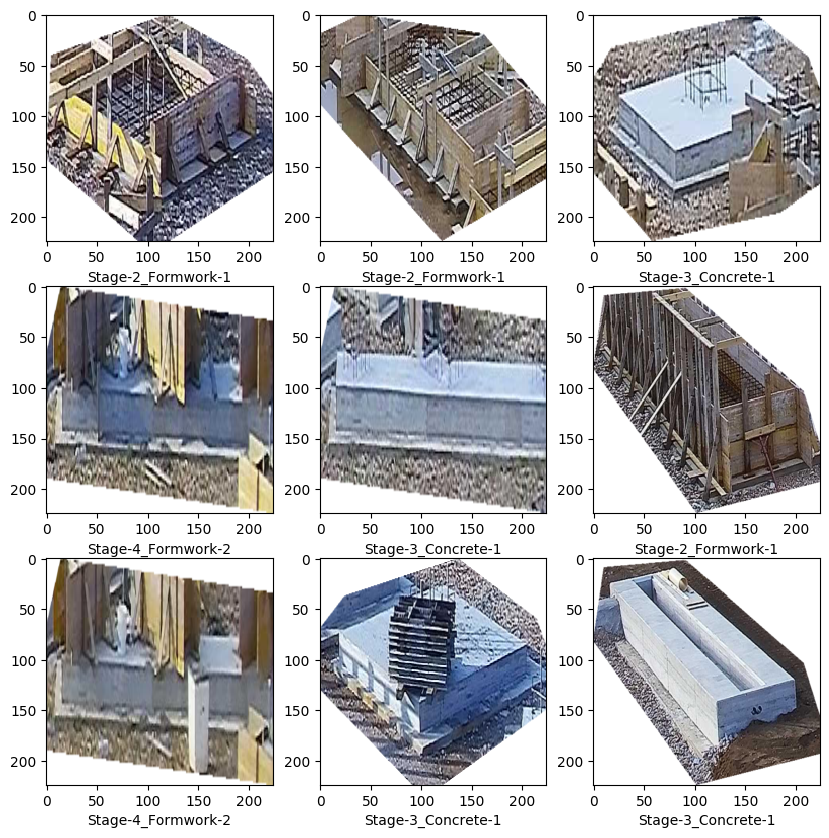

In [24]:
nrows=3
ncols=3
f, axs = plt.subplots(nrows, ncols, figsize=(10, 10))
for i in range(nrows):
    for j in range(ncols):
        # axs[i][j].xticks([])
        # axs[i][j].yticks([])
        axs[i][j].imshow(train_dataset[i*nrows + j][0].permute(1,2,0))
        axs[i][j].set_xlabel(train_dataset[i*nrows + j][1])
plt.show()
# plt.imshow(image.permute(1, 2, 0))

In [25]:
train_df.shape

(2758, 5)